In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from CartPole_ import CartPole
from CartPoleNoise_ import CartPoleGaussianNoisyDyn, CartPoleGaussianNoisyObs, CartPoleGaussianNoisyObsDyn

matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'image.cmap':'jet'
})

from NonLinearObserver_ import NonLinearObserver
from LinearController_ import LinearController

from shared import get_initial_states, plot_rollout, np_to_string, get_scan_states_ranges, plot_actual_and_predicted_states_contour

In [3]:
# Task 3.1

In [4]:
from NonLinearObserver_ import NonLinearObserver
from CartPoleNoise_ import CartPoleDynamicGaussianNoisyObs

target = CartPoleDynamicGaussianNoisyObs(False, loc=0, factor=0.1)
target_no_noise = CartPole(False)
model_3_3 = NonLinearObserver.initialize_model(N=13, M=8, with_action=True)
model_3_3.load_model("./models/3_3__13__8")

Text(0.5, 0.98, 'Actual (solid) rollout and predicted (dotted) rollout from [0., 0., 0.1, 0.]')

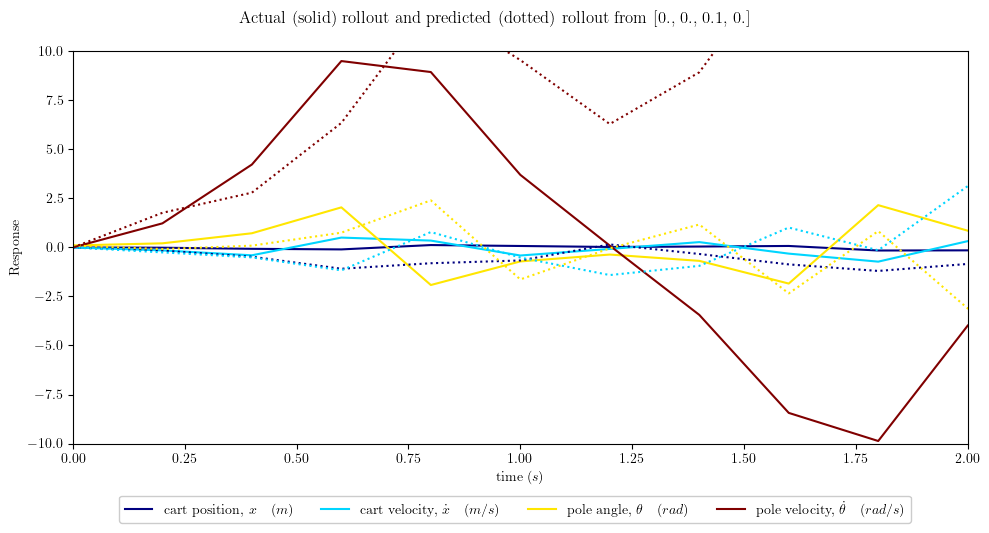

In [5]:
from shared import plot_rollout_single

n = 4
colors = plt.cm.jet(np.linspace(0, 1, n))
fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout='tight')

s0 = np.array([0, 0, 0.1, 0, 0])
x, y = target_no_noise.simulate(time=5, state=s0, remap=True)
x_hat, y_hat = model_3_3.simulate(time=5, state=s0, remap=True)

plot_rollout_single(x, y, ax, fig, color=colors, linestyle='solid', legend=True)
plot_rollout_single(x_hat, y_hat, ax, fig, color=colors, linestyle='dotted', legend=False)
ax.set(ylim=(-10, 10), xlim=(0, 2))

lgd = fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=4)
fig.suptitle("Actual (solid) rollout and predicted (dotted) rollout from [0., 0., 0.1, 0.]")

In [6]:
# Fit linear controller

[1.00112961 1.00033521 0.99974473 1.04997397]


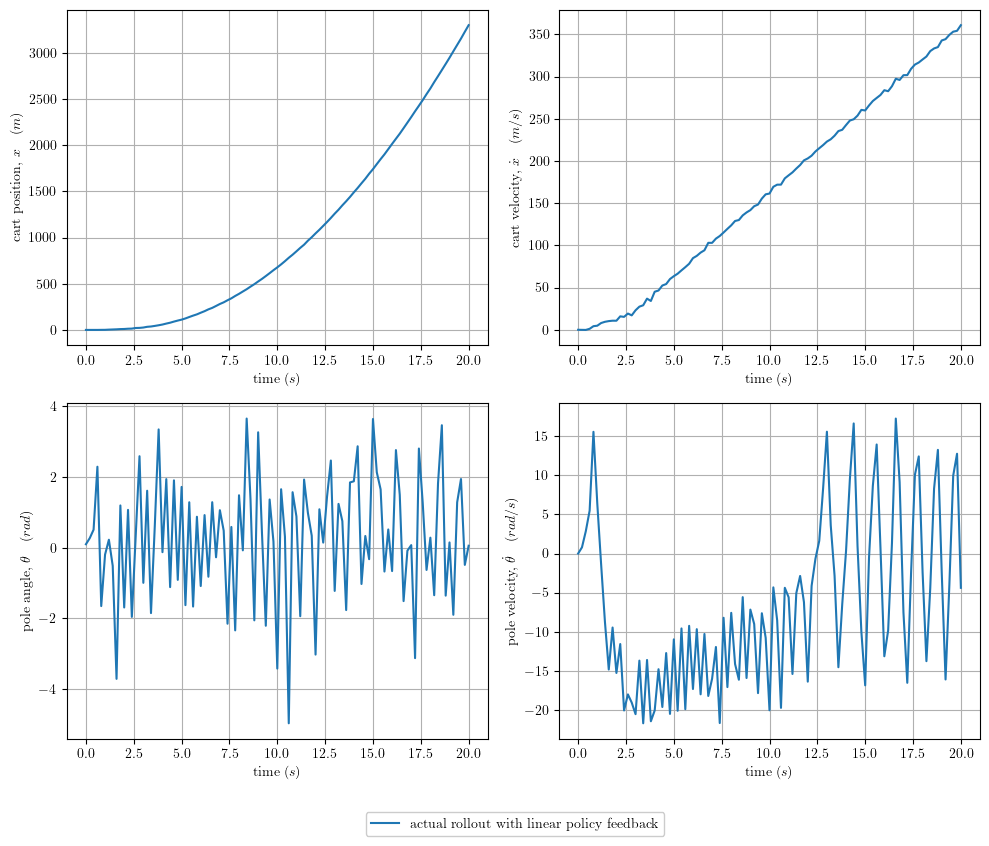

In [7]:
from optimizer import Optimizer
from NonLinearObserver_ import NonLinearObserver
from CartPoleNoise_ import CartPoleDynamicGaussianNoisyObs

optimizer = Optimizer()
target = CartPoleDynamicGaussianNoisyObs(False, loc=0, factor=0.1)
target_no_noise = CartPole(False)
controller = LinearController.get_linear_controller()
p0 = np.array([ 1, 1, 1, 1])

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
s0 = np.array([0, 0, 0.1, 0, 0])

p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=10, remap=True)
controller.p = p_opt
print(p_opt)

x_target, y_target = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=20)

plot_rollout(x_target, y_target, axs, fig, label='actual rollout with linear policy feedback')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

[10.25172567  6.08114863 -2.96803795 -9.48428168]
[-2.77184405 -6.41817762  1.18165605  4.33447682]
[-7.53785548  1.00972918 -1.13346923 -4.62529639]
[ 0.09041134 -1.4077236   2.42531427  9.99541699]
[ 3.89912454  3.22152264  0.60679703 15.09483888]
[-9.01997892 -4.24506878 -2.00017125 -1.69251548]
[-1.05232109  8.22092321  1.95819366  1.89669786]
[  6.30087216  -8.82994255  -0.19796485 -14.73240768]
[ 5.8675487   2.2108328   2.06159995 -2.86359919]
[-1.72583986 -0.27104173 -0.75662047 11.31499201]
[ -7.78707772   7.50209634   0.04892519 -11.53664385]
[ 4.29664082 -5.38101949 -1.88162979  2.71296408]
[ 1.97306655  9.88014518 -1.32843072  7.22333293]
[-5.48959973 -7.85544679  3.02070329 -9.10884496]
[-4.70486206  4.72786998 -2.5031037   9.00735987]
[ 8.27144604 -2.82947391  1.00663185 -7.11546296]
[ 8.8544249   4.1120117  -0.40837385  0.28397493]
[ -3.83362983  -3.30949608   2.29519724 -13.99595136]
[-6.02227079  9.2271089  -1.71150335 13.64149259]
[ 1.48506271 -8.61348686  0.38439407 -

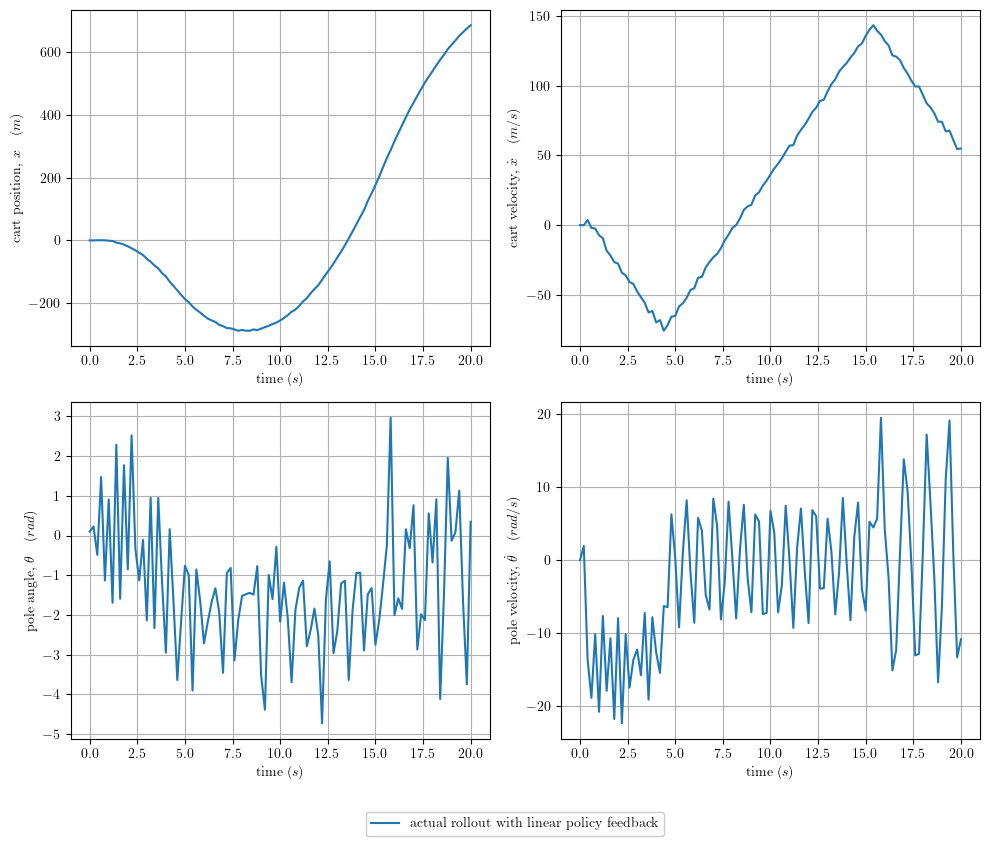

In [8]:
from optimizer import Optimizer
from NonLinearObserver_ import NonLinearObserver
from CartPoleNoise_ import CartPoleDynamicGaussianNoisyObs
from shared import get_sobol_points

optimizer = Optimizer()
target = CartPoleDynamicGaussianNoisyObs(False, loc=0, factor=0.1)
target_no_noise = CartPole(False)
controller = LinearController.get_linear_controller()

sobol_points = get_sobol_points(m=5, d=4)

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')


s0 = np.array([0, 0, 0.1, 0, 0])

for p0 in sobol_points:
    p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=3, remap=True)
    print(p_opt)
    controller.p = optimizer.sol
    

print(f"final: {controller.p}")
x_target, y_target = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=20)

plot_rollout(x_target, y_target, axs, fig, label='actual rollout with linear policy feedback')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

[-1.71077612 -0.27980261 -0.73479683 11.21124701]


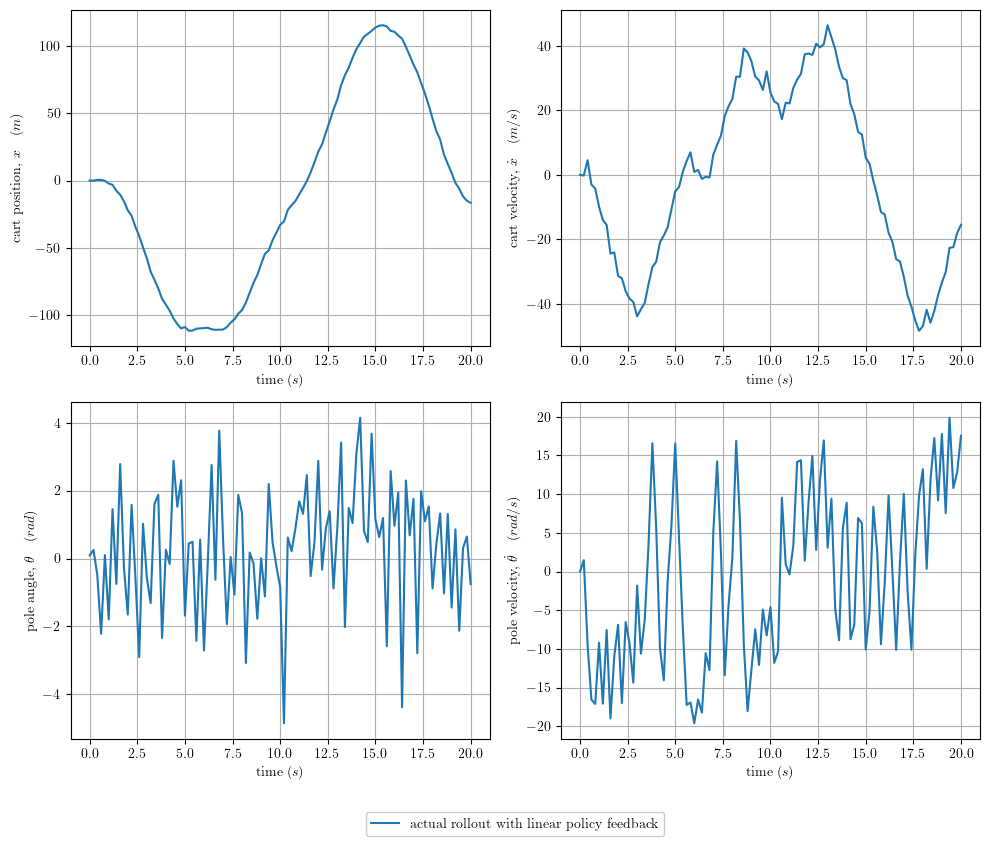

In [9]:
from optimizer import Optimizer
from NonLinearObserver_ import NonLinearObserver
from CartPoleNoise_ import CartPoleDynamicGaussianNoisyObs
from shared import get_sobol_points

optimizer = Optimizer()
target = CartPoleDynamicGaussianNoisyObs(False, loc=0, factor=0.1)
target_no_noise = CartPole(False)
controller = LinearController.get_linear_controller()
p0 = np.array([-1.65877611, -0.27141109, -0.76332242, 11.27560308])

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
s0 = np.array([0, 0, 0.1, 0, 0])

p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=2, remap=True)
controller.p = p_opt
print(p_opt)

x_target, y_target = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=20)

plot_rollout(x_target, y_target, axs, fig, label='actual rollout with linear policy feedback')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

[ 9.96347266  6.18329696 -2.97163896 -9.75666891]
[-2.79072253 -6.35017515  1.2495162   4.12087951]
[-7.16036974  1.09547366 -1.14060381 -4.68558761]
[ 0.08949695 -1.35318378  2.46575412  9.75357132]
[ 3.67984909  3.31860227  0.61915889 14.40369749]
[-8.88816339 -4.17656132 -2.16508729 -1.66110127]
[-1.05556158  8.94889287  1.81262255  1.6888698 ]
[  6.24197008  -9.60653322  -0.18867381 -15.10911014]
[ 5.74438475  2.30500582  2.10741101 -2.71921196]
[-1.71689566 -0.27056419 -0.75348174 11.52156099]
[ -8.17264499   7.19411072   0.04780144 -11.44283561]
[ 4.41267384 -5.05225272 -1.87778206  2.58731949]
[ 2.09286217  9.21407428 -1.32438854  7.06511032]
[-5.54603693 -7.86223028  3.04268117 -8.92609459]
[-4.64920527  4.78958083 -2.444072    8.98408382]
[ 7.87698789 -2.97122642  1.00664477 -7.11578428]
[ 8.42860089  4.15148995 -0.41756769  0.29254564]
[ -4.07307285  -3.20734814   2.27685159 -14.56970308]
[-6.22817428  9.30224706 -1.65294696 13.74593207]
[ 1.49463222 -8.3290686   0.37906626 -

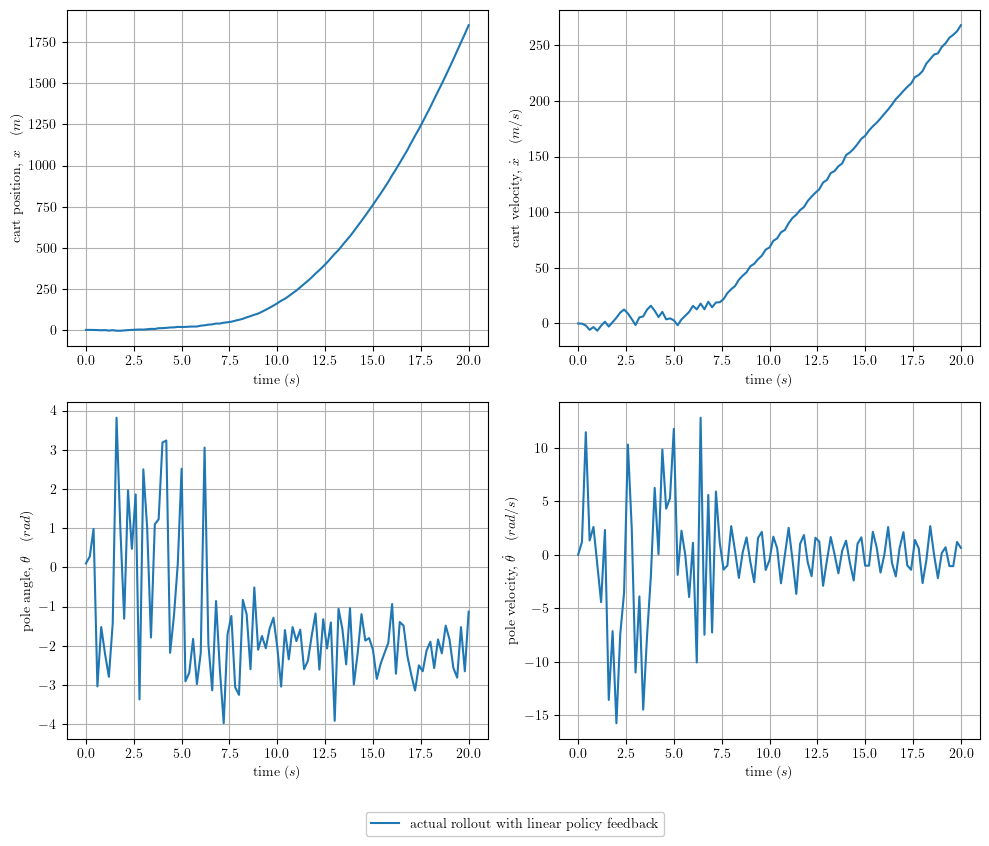

In [10]:
from optimizer import Optimizer
from NonLinearObserver_ import NonLinearObserver
from CartPoleNoise_ import CartPoleDynamicGaussianNoisyObs
from shared import get_sobol_points

optimizer = Optimizer()
target = CartPoleDynamicGaussianNoisyObs(False, loc=0, factor=0.1)
target_no_noise = CartPole(False)
controller = LinearController.get_linear_controller()

sobol_points = get_sobol_points(m=5, d=4)

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')


s0 = np.array([0, 0, 0.1, 0, 0])

for p0 in sobol_points:
    p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=2, remap=True)
    print(p_opt)
    controller.p = optimizer.sol
    

print(f"final: {controller.p}")
x_target, y_target = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=20)

plot_rollout(x_target, y_target, axs, fig, label='actual rollout with linear policy feedback')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

[ 2.96959301 -4.8446238  -0.83602833 -8.33405191]


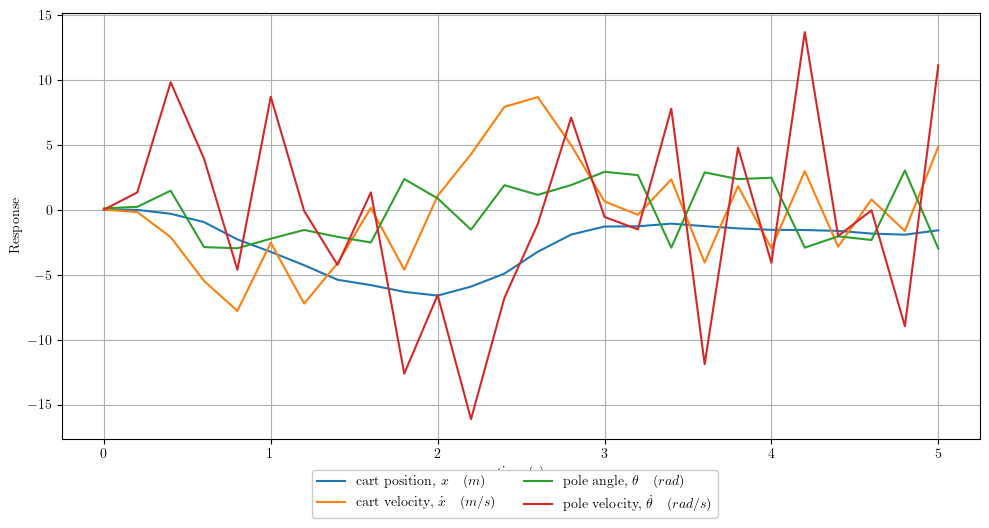

In [11]:
from optimizer import Optimizer
from NonLinearObserver_ import NonLinearObserver
from CartPoleNoise_ import CartPoleDynamicGaussianNoisyObs
from shared import get_sobol_points

optimizer = Optimizer()
target = CartPoleDynamicGaussianNoisyObs(False, loc=0, factor=0.1)
target_no_noise = CartPole(False)
controller = LinearController.get_linear_controller()
p0 = np.array([ 2.87933055, -4.69932936, -0.86848383, -8.38189198])

fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout='tight')
s0 = np.array([0, 0, 0.1, 0, 0])

p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=2, remap=True)
controller.p = p_opt
print(p_opt)

x_target, y_target = target_no_noise.simulate_with_feedback(state=s0, remap=True, controller=controller, time=5)

plot_rollout_single(x_target, y_target, ax, fig, color=[None] * 4, linestyle='solid', legend=True)
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

[  9.73285834   6.05062301  -3.07066281 -10.2154587 ]
[-2.852723   -6.43636261  1.1969691   4.17045929]
[-7.41678446  1.04146838 -1.15882015 -4.44469557]
[ 0.0877065  -1.45501174  2.49105615  9.95665074]
[ 3.8720208   3.28955227  0.61115563 14.27841662]
[-9.26812943 -4.16357026 -2.1107131  -1.64923134]
[-1.04942474  8.66364542  1.83477686  1.86085757]
[  6.51876696  -9.21307644  -0.19917698 -14.01895543]
[ 5.82470176  2.19273095  2.07306716 -2.72827681]
[-1.65905483 -0.26594697 -0.763717   11.49209602]
[ -8.68088858   7.0839952    0.04853561 -11.42591384]
[ 4.3784504  -5.21734594 -2.00257514  2.57539831]
[ 1.98106254 10.13573327 -1.32886307  7.22270817]
[-5.66409345 -7.85285701  3.06923552 -8.71634566]
[-4.75559742  4.6622114  -2.52380837  9.09581814]
[ 7.56750622 -2.99207066  1.05915761 -7.50694045]
[ 8.65052688  4.20261894 -0.39880813  0.28631996]
[ -3.85934702  -3.36372794   2.29634768 -14.37411775]
[-5.82425667  9.30069974 -1.59312688 14.31600466]
[ 1.48741851 -8.32993595  0.377005

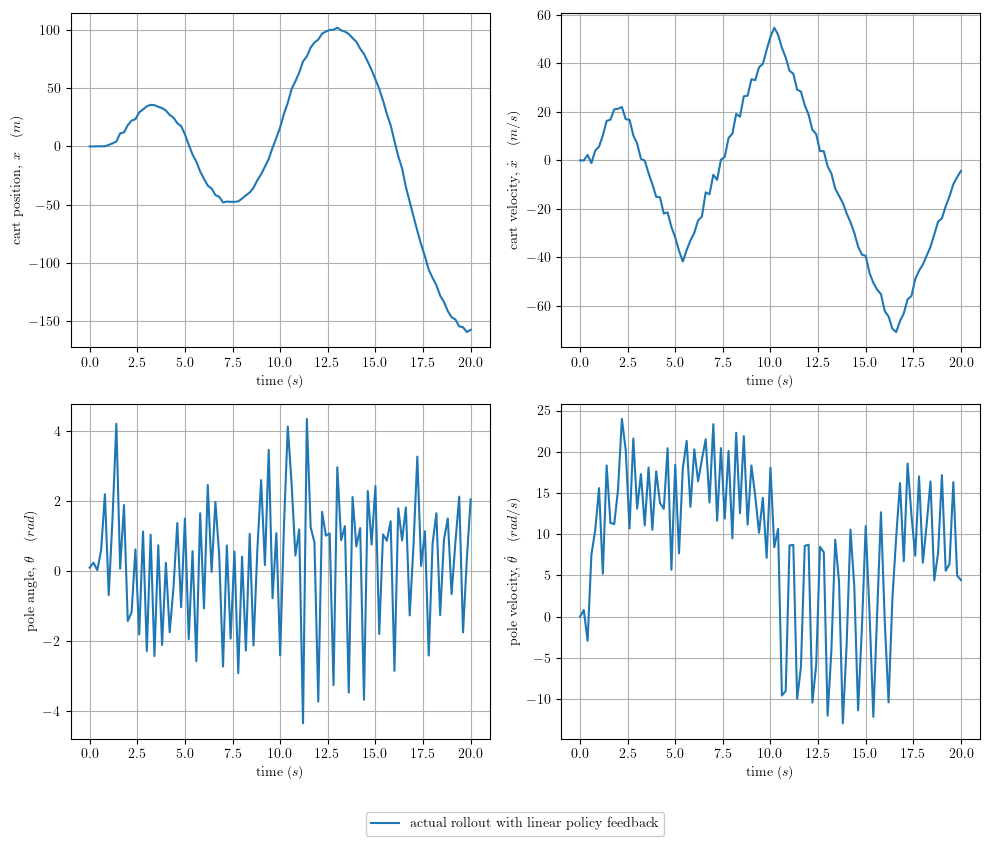

In [12]:
from optimizer import Optimizer
from NonLinearObserver_ import NonLinearObserver
from CartPoleNoise_ import CartPoleDynamicGaussianNoisyObs
from shared import get_sobol_points

optimizer = Optimizer()
target = CartPoleDynamicGaussianNoisyObs(False, loc=0, factor=0.1)
target_no_noise = CartPole(False)
controller = LinearController.get_linear_controller()

sobol_points = get_sobol_points(m=5, d=4)

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')


s0 = np.array([0, 0, 0.1, 0, 0])

for p0 in sobol_points:
    p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=10, remap=True)
    print(p_opt)
    controller.p = optimizer.sol
    

print(f"final: {controller.p}")
x_target, y_target = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=20)

plot_rollout(x_target, y_target, axs, fig, label='actual rollout with linear policy feedback')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

49.96752177889026
[-1.67622963 -0.27176945 -0.79424788 11.8145697 ]


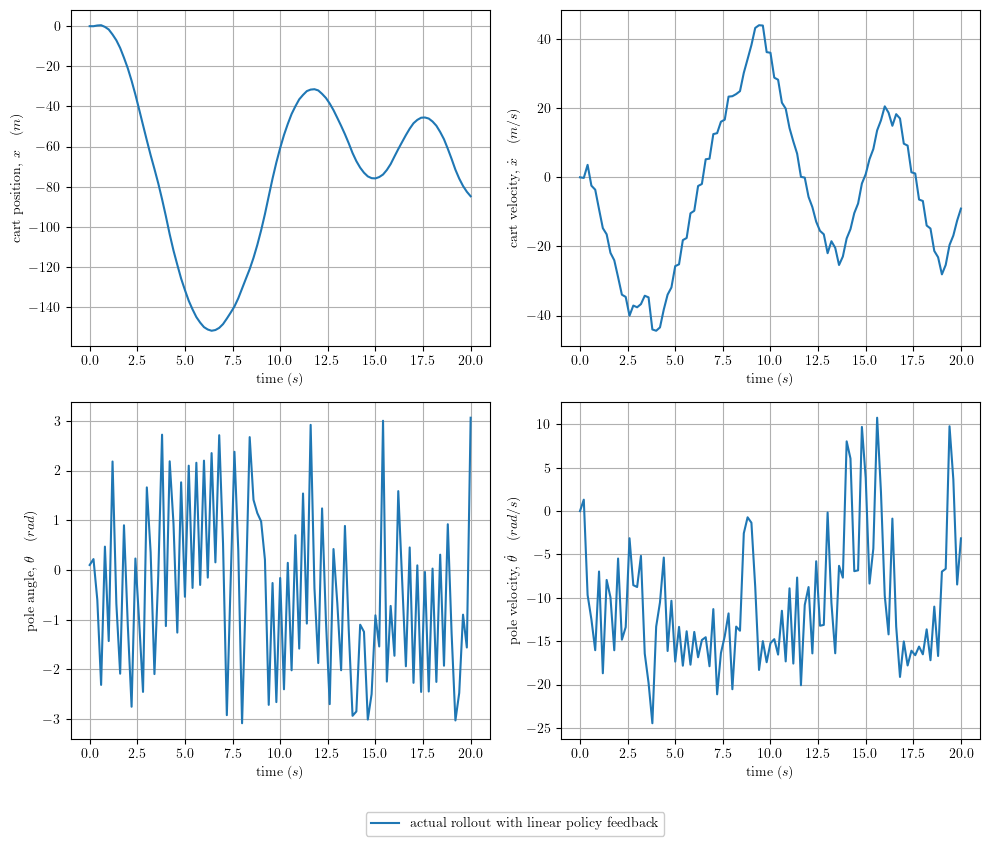

In [13]:
from optimizer import Optimizer
from NonLinearObserver_ import NonLinearObserver
from CartPoleNoise_ import CartPoleDynamicGaussianNoisyObs
from shared import get_sobol_points

optimizer = Optimizer()
target = CartPoleDynamicGaussianNoisyObs(False, loc=0, factor=0.1)
target_no_noise = CartPole(False)
controller = LinearController.get_linear_controller()
p0 = np.array([-1.5979663,  -0.27168339, -0.79378162, 11.80998694])

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
s0 = np.array([0, 0, 0.1, 0, 0])

p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=10, remap=True)
print(loss)
controller.p = p_opt
print(p_opt)

x_target, y_target = target_no_noise.simulate_with_feedback(state=s0, remap=True, controller=controller, time=20)

plot_rollout(x_target, y_target, axs, fig, label='actual rollout with linear policy feedback')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

9.901172927984794
[ 1.84499533  2.21375492 17.60927628  3.16967359]


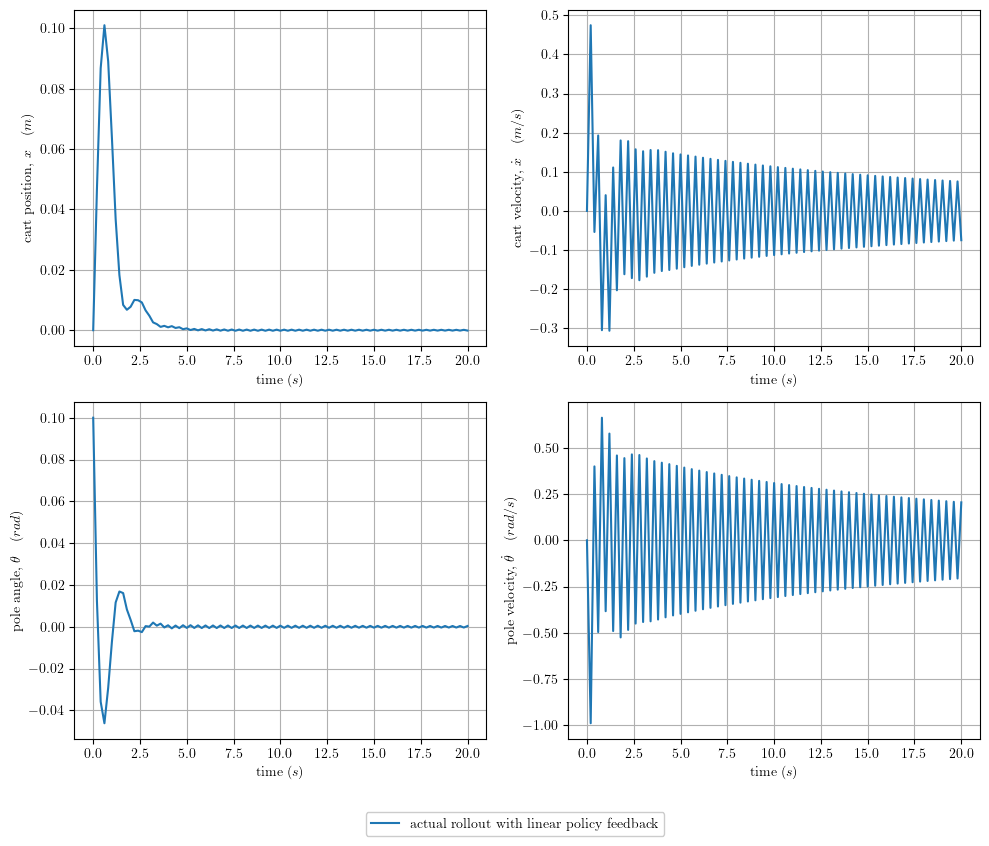

In [14]:
from optimizer import Optimizer
from NonLinearObserver_ import NonLinearObserver
from CartPoleNoise_ import CartPoleDynamicGaussianNoisyObs
from shared import get_sobol_points

optimizer = Optimizer()
target = CartPoleDynamicGaussianNoisyObs(False, loc=0, factor=0.1)
target_no_noise = CartPole(False)
controller = LinearController.get_linear_controller()
p0 = np.array([ 1.8,  2.2, 17.5,  3.15])

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
s0 = np.array([0, 0, 0.1, 0, 0])

p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=2, remap=True)
print(loss)
controller.p = p_opt
print(p_opt)

x_target, y_target = target_no_noise.simulate_with_feedback(state=s0, remap=True, controller=controller, time=20)

plot_rollout(x_target, y_target, axs, fig, label='actual rollout with linear policy feedback')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

[ 1.73808065  2.27665273 16.9559523   3.2877347 ]


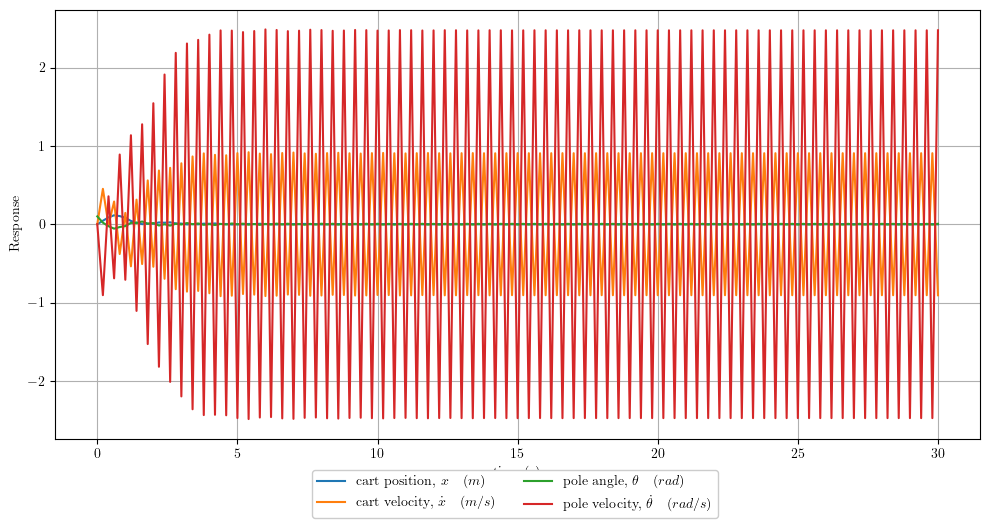

In [15]:
from optimizer import Optimizer
from NonLinearObserver_ import NonLinearObserver
from CartPoleNoise_ import CartPoleDynamicGaussianNoisyObs
from shared import get_sobol_points

optimizer = Optimizer()
target = CartPoleDynamicGaussianNoisyObs(False, loc=0, factor=0.1)
target_no_noise = CartPole(False)
controller = LinearController.get_linear_controller()
p0 = np.array([ 1.8,  2.2, 17.5,  3.15])
fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout='tight')
s0 = np.array([0, 0, 0.1, 0, 0])

p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=10, remap=True)
controller.p = p_opt
print(p_opt)

x_target, y_target = target_no_noise.simulate_with_feedback(state=s0, remap=True, controller=controller, time=30)

plot_rollout_single(x_target, y_target, ax, fig, color=[None] * 4, linestyle='solid', legend=True)
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=4)

[ 1.8   2.2  17.5   3.15]


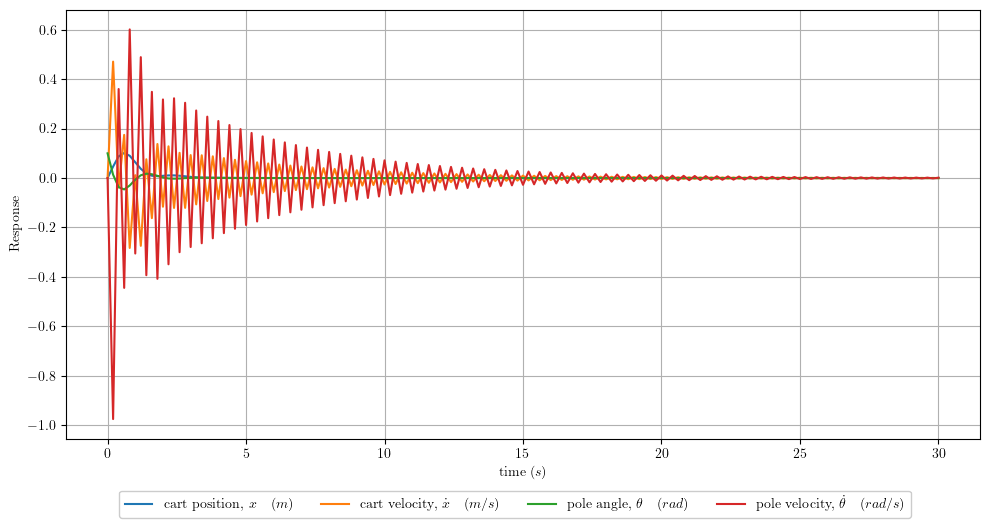

In [17]:
from optimizer import Optimizer
from NonLinearObserver_ import NonLinearObserver
from CartPoleNoise_ import CartPoleDynamicGaussianNoisyObs
from shared import get_sobol_points

optimizer = Optimizer()
model = model_3_3
target_no_noise = CartPole(False)
controller = LinearController.get_linear_controller()
p0 = np.array([ 1.8,  2.2, 17.5,  3.15])
fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout='tight')
s0 = np.array([0, 0, 0.1, 0, 0])

p_opt, loss = optimizer.optimize_linear(model, controller, s0, p0, verbose=False, loss_func=1, time=10, remap=True)
controller.p = p_opt
print(p_opt)

x_target, y_target = target_no_noise.simulate_with_feedback(state=s0, remap=True, controller=controller, time=30)

plot_rollout_single(x_target, y_target, ax, fig, color=[None] * 4, linestyle='solid', legend=True)
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=4)